In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


In [75]:
iris = pd.read_excel("iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
iris.groupby('iris').petallength.count()

iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: petallength, dtype: int64

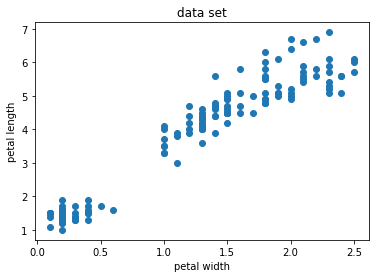

In [77]:
plt.scatter(iris.petalwidth, iris.petallength)
plt.title("data set")
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()

In [78]:
X = iris.drop('iris', axis = 1)
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


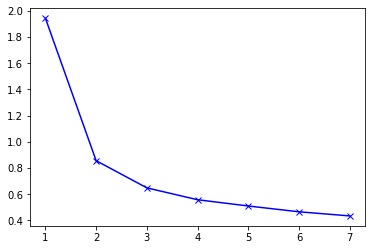

In [79]:
#lua chon so nhom de phan cum
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.show()
    

In [85]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [86]:
#So sanh ket qua
i_class = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris_class = [i_class[i] for i in iris.iris]

X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
print("Accuracy : ", metrics.accuracy_score(iris_class, labels))

Accuracy :  0.8933333333333333


In [90]:
X_test = np.array([[4.7, 3.2, 1.5, 0.4],[4.8, 3.5, 4.5, 1.6],[6.1, 3.5, 5.7, 2]])
y_test = kmeans.predict(X_test)
y_test

array([0, 1, 2])

In [91]:
X['Group'] = iris_class

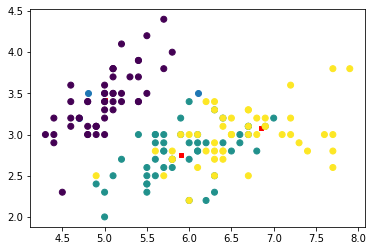

In [92]:
plt.scatter(centroids[:,0], centroids[:,1], marker='s', s = 15, color='red')
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(X[['sepallength']], X[['sepalwidth']], c= X['Group'])